In [1]:
import pandas as pd

def load_and_inspect_data():
    # Paths to the saved datasets
    file_paths = {
        'X_train': 'X_train.csv',
        'y_train': 'y_train.csv',
        'X_test': 'X_test.csv',
        'y_test': 'y_test.csv'
    }

    datasets = {}

    # Load and inspect datasets
    for name, path in file_paths.items():
        data = pd.read_csv(path)
        datasets[name] = data

        # Inspecting the data
        print(f"--- {name} ---")
        print("Head:\n", data.head())
        print("Shape:", data.shape)
        print("NaN Values:", data.isnull().sum().sum(), "\n")

    return datasets

# Load datasets
datasets = load_and_inspect_data()

# Access individual datasets as needed
X_train = datasets['X_train']
y_train = datasets['y_train']
X_test = datasets['X_test']
y_test = datasets['y_test']



--- X_train ---
Head:
      x_mean  x_std_dev  x_variance      x_icv  x_median  x_minimum  x_maximum  \
0  1.597989   0.871949    0.760295   1.832664   1.65439  -0.596156    4.04860   
1  1.122011   0.261785    0.068531   4.286003   1.13006   0.466869    1.69509   
2  4.777699   0.159983    0.025595  29.863788   4.79080   4.352660    5.14035   
3 -7.424602   0.222700    0.049595 -33.338992  -7.42442  -8.006210   -6.67982   
4  4.101160   0.665265    0.442577   6.164702   4.16711   2.319980    5.47075   

   x_skewness  x_kurtosis     x_iqr  ...    z_max_psd  z_spectral_entropy  \
0   -0.016359   -0.233327  1.205480  ...  88646.86880            0.280687   
1   -0.034125   -0.722782  0.412401  ...  90211.36877            0.008790   
2   -0.159726   -0.700124  0.249000  ...  71420.95751            0.004061   
3    0.143715    0.268646  0.311840  ...  20285.62694            0.089173   
4   -0.379157   -0.270292  0.909800  ...  93785.43137            0.139020   

   z_peak_frequency  z_spec

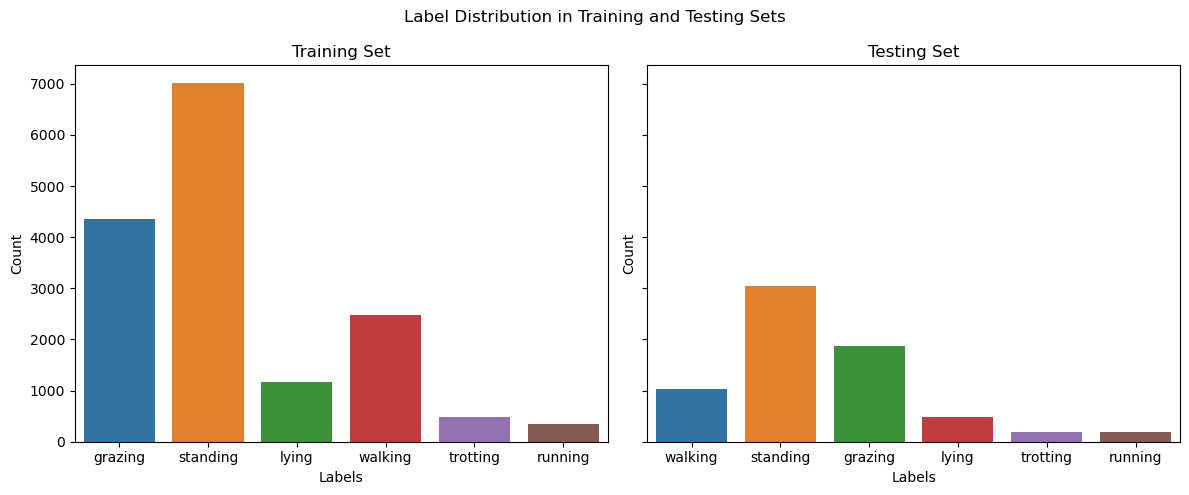

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_label_distribution(y_train, y_test):

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    fig.suptitle('Label Distribution in Training and Testing Sets')

    # Training set distribution
    sns.countplot(ax=axes[0], x=y_train.iloc[:, 0])
    axes[0].set_title('Training Set')
    axes[0].set_xlabel('Labels')
    axes[0].set_ylabel('Count')

    # Testing set distribution
    sns.countplot(ax=axes[1], x=y_test.iloc[:, 0])
    axes[1].set_title('Testing Set')
    axes[1].set_xlabel('Labels')
    axes[1].set_ylabel('Count')

    plt.tight_layout()
    plt.savefig('datasets_distribution')
    plt.show()

# Call the function
plot_label_distribution(y_train, y_test)


In [3]:
# Importing the libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Convert DataFrame to 1D array
y_train_np = y_train.to_numpy().ravel()
y_test_np = y_test.to_numpy().ravel()

# Step 2: Label Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_np)
y_test_encoded = label_encoder.transform(y_test_np)

# Step 3: Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Convert scaled arrays back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [4]:
# Renaming the datasets 
y_train = y_train_encoded
y_test = y_test_encoded
X_train = X_train_scaled_df
X_test = X_test_scaled_df

In [5]:
X_train.shape, len(y_train), X_test.shape, len(y_test)

((15857, 85), 15857, (6796, 85), 6796)

## Testing Various Classifiers

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from tqdm import tqdm
import itertools

def test_various_classifiers(X_train, y_train, X_test, y_test):
    # Dictionary to hold the classifiers and their parameters
    classifiers = {
        'Logistic RegressionM': {
            'model': LogisticRegression(),
            'params': {'multi_class': ['multinomial'], 'solver': ['newton-cg', 'sag', 'saga'],
                      'max_iter': [10000],
                      'random_state' : [42]}
        },
        'Logistic RegressionOvR': {
            'model': LogisticRegression(),
            'params': {'multi_class': ['ovr'], 'solver': ['liblinear'], 'random_state' : [42]}
        },
        'SVM Radial': {
            'model': SVC(),
            'params': {'C': [1, 10], 'gamma': ['scale', 'auto'], 'random_state' : [42]}
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
        },
        'Decision Trees': {
            'model': DecisionTreeClassifier(),
            'params': {'max_depth': [None, 10, 20], 'random_state' : [42]}
        },
        'Random Forest': {
            'model': RandomForestClassifier(),
            'params': {'n_estimators': [50, 100, 200], 'max_features': ['sqrt']}
        },
        'AdaBoost': {
            'model':AdaBoostClassifier(),
            'params':{}
        },
        'XGBoost': {
            'model': XGBClassifier(eval_metric='mlogloss'),
            'params': {}
        },
        'GBM': {
            'model': GradientBoostingClassifier(),
            'params': {}
        },
        'LightGBM': {
            'model': LGBMClassifier(),
            'params': {}
        },
        'Naive Bayes': {
            'model': GaussianNB(),
            'params': {}
        },
        'MLP': {
            'model': MLPClassifier(),
            'params': {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                       'activation': ['tanh', 'relu'],
                       'solver': ['sgd', 'adam'],
                       'learning_rate': ['constant','adaptive'],
                       'alpha': [0.0001, 0.001, 0.5], 'max_iter': [1000, 2000], 'random_state' : [42]}
        },
        'Linear Discriminant Analysis': {
            'model': LinearDiscriminantAnalysis(),
            'params': {}
        },
        'Quadratic Discriminant Analysis': {
            'model': QuadraticDiscriminantAnalysis(),
            'params': {}
        }
    }

    results = []

    # Iterate through each classifier and parameter combination
    for clf_name, clf_dict in tqdm(classifiers.items(), desc="Evaluating Classifiers"):
        for param_combination in itertools.product(*clf_dict['params'].values()):
            param_dict = dict(zip(clf_dict['params'].keys(), param_combination))
            clf = clf_dict['model'].set_params(**param_dict)

            # Training and evaluation
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            results.append((clf_name, param_dict, score))
            print(f"Classifier: {clf_name}, Params: {param_dict}, Score: {score}")

    return results

# Call the function with the datasets
results = test_various_classifiers(X_train, y_train, X_test, y_test)


Evaluating Classifiers:   0%|                                                                   | 0/14 [00:00<?, ?it/s]

Classifier: Logistic RegressionM, Params: {'multi_class': 'multinomial', 'solver': 'newton-cg', 'max_iter': 10000, 'random_state': 42}, Score: 0.9114184814596822
Classifier: Logistic RegressionM, Params: {'multi_class': 'multinomial', 'solver': 'sag', 'max_iter': 10000, 'random_state': 42}, Score: 0.9112713360800471


Evaluating Classifiers:   7%|████▏                                                     | 1/14 [01:40<21:48, 100.67s/it]

Classifier: Logistic RegressionM, Params: {'multi_class': 'multinomial', 'solver': 'saga', 'max_iter': 10000, 'random_state': 42}, Score: 0.9105356091818717


Evaluating Classifiers:  14%|████████▍                                                  | 2/14 [01:43<08:37, 43.16s/it]

Classifier: Logistic RegressionOvR, Params: {'multi_class': 'ovr', 'solver': 'liblinear', 'random_state': 42}, Score: 0.9022954679223072
Classifier: SVM Radial, Params: {'C': 1, 'gamma': 'scale', 'random_state': 42}, Score: 0.9339317245438493
Classifier: SVM Radial, Params: {'C': 1, 'gamma': 'auto', 'random_state': 42}, Score: 0.9339317245438493
Classifier: SVM Radial, Params: {'C': 10, 'gamma': 'scale', 'random_state': 42}, Score: 0.9496762801648029


Evaluating Classifiers:  21%|████████████▋                                              | 3/14 [01:59<05:37, 30.72s/it]

Classifier: SVM Radial, Params: {'C': 10, 'gamma': 'auto', 'random_state': 42}, Score: 0.9496762801648029
Classifier: KNN, Params: {'n_neighbors': 3, 'weights': 'uniform'}, Score: 0.9256915832842849
Classifier: KNN, Params: {'n_neighbors': 3, 'weights': 'distance'}, Score: 0.9253972925250147
Classifier: KNN, Params: {'n_neighbors': 5, 'weights': 'uniform'}, Score: 0.9249558563861094
Classifier: KNN, Params: {'n_neighbors': 5, 'weights': 'distance'}, Score: 0.9252501471453797
Classifier: KNN, Params: {'n_neighbors': 7, 'weights': 'uniform'}, Score: 0.9230429664508535


Evaluating Classifiers:  29%|████████████████▊                                          | 4/14 [02:03<03:20, 20.03s/it]

Classifier: KNN, Params: {'n_neighbors': 7, 'weights': 'distance'}, Score: 0.9246615656268393
Classifier: Decision Trees, Params: {'max_depth': None, 'random_state': 42}, Score: 0.9020011771630371
Classifier: Decision Trees, Params: {'max_depth': 10, 'random_state': 42}, Score: 0.9062683931724543


Evaluating Classifiers:  36%|█████████████████████                                      | 5/14 [02:06<02:06, 14.05s/it]

Classifier: Decision Trees, Params: {'max_depth': 20, 'random_state': 42}, Score: 0.9042083578575633
Classifier: Random Forest, Params: {'n_estimators': 50, 'max_features': 'sqrt'}, Score: 0.9510005885815186
Classifier: Random Forest, Params: {'n_estimators': 100, 'max_features': 'sqrt'}, Score: 0.9496762801648029


Evaluating Classifiers:  43%|█████████████████████████▎                                 | 6/14 [02:48<03:09, 23.69s/it]

Classifier: Random Forest, Params: {'n_estimators': 200, 'max_features': 'sqrt'}, Score: 0.9512948793407887


Evaluating Classifiers:  50%|█████████████████████████████▌                             | 7/14 [02:56<02:08, 18.36s/it]

Classifier: AdaBoost, Params: {}, Score: 0.41068275456150677


Evaluating Classifiers:  57%|█████████████████████████████████▋                         | 8/14 [03:00<01:22, 13.79s/it]

Classifier: XGBoost, Params: {}, Score: 0.9617422012948793


Evaluating Classifiers:  64%|█████████████████████████████████████▉                     | 9/14 [07:04<07:09, 85.91s/it]

Classifier: GBM, Params: {}, Score: 0.9473219540906416
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003846 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20811
[LightGBM] [Info] Number of data points in the train set: 15857, number of used features: 85
[LightGBM] [Info] Start training from score -1.291139
[LightGBM] [Info] Start training from score -2.610890
[LightGBM] [Info] Start training from score -3.796436
[LightGBM] [Info] Start training from score -0.816131
[LightGBM] [Info] Start training from score -3.493422
[LightGBM] [Info] Start training from score -1.854144
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Evaluating Classifiers:  71%|█████████████████████████████████████████▍                | 10/14 [07:05<03:58, 59.72s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Classifier: LightGBM, Params: {}, Score: 0.9611536197763391
Classifier: Naive Bayes, Params: {}, Score: 0.8187168922895821
Classifier: MLP, Params: {'hidden_layer_sizes': (50, 50, 50), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate': 'constant', 'alpha': 0.0001, 'max_iter': 1000, 'random_state': 42}, Score: 0.9362860

C:\Users\nklea\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Classifier: MLP, Params: {'hidden_layer_sizes': (50, 50, 50), 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'adaptive', 'alpha': 0.5, 'max_iter': 1000, 'random_state': 42}, Score: 0.9458505002942907
Classifier: MLP, Params: {'hidden_layer_sizes': (50, 50, 50), 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'adaptive', 'alpha': 0.5, 'max_iter': 2000, 'random_state': 42}, Score: 0.9458505002942907
Classifier: MLP, Params: {'hidden_layer_sizes': (50, 50, 50), 'activation': 'relu', 'solver': 'adam', 'learning_rate': 'constant', 'alpha': 0.0001, 'max_iter': 1000, 'random_state': 42}, Score: 0.9359917598587404
Classifier: MLP, Params: {'hidden_layer_sizes': (50, 50, 50), 'activation': 'relu', 'solver': 'adam', 'learning_rate': 'constant', 'alpha': 0.0001, 'max_iter': 2000, 'random_state': 42}, Score: 0.9359917598587404
Classifier: MLP, Params: {'hidden_layer_sizes': (50, 50, 50), 'activation': 'relu', 'solver': 'adam', 'learning_rate': 'constant', 'alpha': 0.001, 'max_iter

C:\Users\nklea\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Classifier: MLP, Params: {'hidden_layer_sizes': (50, 100, 50), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate': 'adaptive', 'alpha': 0.0001, 'max_iter': 1000, 'random_state': 42}, Score: 0.9349617422012949
Classifier: MLP, Params: {'hidden_layer_sizes': (50, 100, 50), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate': 'adaptive', 'alpha': 0.0001, 'max_iter': 2000, 'random_state': 42}, Score: 0.9349617422012949


C:\Users\nklea\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Classifier: MLP, Params: {'hidden_layer_sizes': (50, 100, 50), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate': 'adaptive', 'alpha': 0.001, 'max_iter': 1000, 'random_state': 42}, Score: 0.9351088875809299
Classifier: MLP, Params: {'hidden_layer_sizes': (50, 100, 50), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate': 'adaptive', 'alpha': 0.001, 'max_iter': 2000, 'random_state': 42}, Score: 0.9351088875809299
Classifier: MLP, Params: {'hidden_layer_sizes': (50, 100, 50), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate': 'adaptive', 'alpha': 0.5, 'max_iter': 1000, 'random_state': 42}, Score: 0.9434961742201294
Classifier: MLP, Params: {'hidden_layer_sizes': (50, 100, 50), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate': 'adaptive', 'alpha': 0.5, 'max_iter': 2000, 'random_state': 42}, Score: 0.9434961742201294
Classifier: MLP, Params: {'hidden_layer_sizes': (50, 100, 50), 'activation': 'tanh', 'solver': 'adam', 'learning_rate': 'constant', 'alpha': 0.0001, 'max_it

C:\Users\nklea\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Classifier: MLP, Params: {'hidden_layer_sizes': (50, 100, 50), 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'adaptive', 'alpha': 0.5, 'max_iter': 1000, 'random_state': 42}, Score: 0.9436433195997646
Classifier: MLP, Params: {'hidden_layer_sizes': (50, 100, 50), 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'adaptive', 'alpha': 0.5, 'max_iter': 2000, 'random_state': 42}, Score: 0.9436433195997646
Classifier: MLP, Params: {'hidden_layer_sizes': (50, 100, 50), 'activation': 'relu', 'solver': 'adam', 'learning_rate': 'constant', 'alpha': 0.0001, 'max_iter': 1000, 'random_state': 42}, Score: 0.9414361389052384
Classifier: MLP, Params: {'hidden_layer_sizes': (50, 100, 50), 'activation': 'relu', 'solver': 'adam', 'learning_rate': 'constant', 'alpha': 0.0001, 'max_iter': 2000, 'random_state': 42}, Score: 0.9414361389052384
Classifier: MLP, Params: {'hidden_layer_sizes': (50, 100, 50), 'activation': 'relu', 'solver': 'adam', 'learning_rate': 'constant', 'alpha': 0.001, 'max

Classifier: MLP, Params: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'constant', 'alpha': 0.001, 'max_iter': 1000, 'random_state': 42}, Score: 0.9412889935256032
Classifier: MLP, Params: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'constant', 'alpha': 0.001, 'max_iter': 2000, 'random_state': 42}, Score: 0.9412889935256032
Classifier: MLP, Params: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'constant', 'alpha': 0.5, 'max_iter': 1000, 'random_state': 42}, Score: 0.9349617422012949
Classifier: MLP, Params: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'constant', 'alpha': 0.5, 'max_iter': 2000, 'random_state': 42}, Score: 0.9349617422012949
Classifier: MLP, Params: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'adaptive', 'alpha': 0.0001, 'max_iter': 1000, 'random_state': 42}, Scor

C:\Users\nklea\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Classifier: MLP, Params: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'adaptive', 'alpha': 0.001, 'max_iter': 1000, 'random_state': 42}, Score: 0.9402589758681578
Classifier: MLP, Params: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'adaptive', 'alpha': 0.001, 'max_iter': 2000, 'random_state': 42}, Score: 0.9402589758681578
Classifier: MLP, Params: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'adaptive', 'alpha': 0.5, 'max_iter': 1000, 'random_state': 42}, Score: 0.9349617422012949
Classifier: MLP, Params: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'adaptive', 'alpha': 0.5, 'max_iter': 2000, 'random_state': 42}, Score: 0.9349617422012949
Classifier: MLP, Params: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'learning_rate': 'constant', 'alpha': 0.0001, 'max_iter': 1000, 'random_state': 42}, Sco

Evaluating Classifiers:  93%|███████████████████████████████████████████████████    | 13/14 [1:06:57<10:54, 654.36s/it]C:\Users\nklea\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
Evaluating Classifiers: 100%|███████████████████████████████████████████████████████| 14/14 [1:06:57<00:00, 286.98s/it]

Classifier: MLP, Params: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'learning_rate': 'adaptive', 'alpha': 0.5, 'max_iter': 2000, 'random_state': 42}, Score: 0.9379046497939965
Classifier: Linear Discriminant Analysis, Params: {}, Score: 0.8861094761624485
Classifier: Quadratic Discriminant Analysis, Params: {}, Score: 0.8150382577987051


In [7]:
results

[('Logistic RegressionM',
  {'multi_class': 'multinomial',
   'solver': 'newton-cg',
   'max_iter': 10000,
   'random_state': 42},
  0.9114184814596822),
 ('Logistic RegressionM',
  {'multi_class': 'multinomial',
   'solver': 'sag',
   'max_iter': 10000,
   'random_state': 42},
  0.9112713360800471),
 ('Logistic RegressionM',
  {'multi_class': 'multinomial',
   'solver': 'saga',
   'max_iter': 10000,
   'random_state': 42},
  0.9105356091818717),
 ('Logistic RegressionOvR',
  {'multi_class': 'ovr', 'solver': 'liblinear', 'random_state': 42},
  0.9022954679223072),
 ('SVM Radial',
  {'C': 1, 'gamma': 'scale', 'random_state': 42},
  0.9339317245438493),
 ('SVM Radial',
  {'C': 1, 'gamma': 'auto', 'random_state': 42},
  0.9339317245438493),
 ('SVM Radial',
  {'C': 10, 'gamma': 'scale', 'random_state': 42},
  0.9496762801648029),
 ('SVM Radial',
  {'C': 10, 'gamma': 'auto', 'random_state': 42},
  0.9496762801648029),
 ('KNN', {'n_neighbors': 3, 'weights': 'uniform'}, 0.9256915832842849),
 

In [8]:
# Find the highest score and its corresponding model and parameters
best_model, best_params, best_score = max(results, key=lambda x: x[2])

# Print the results
print("Best Model:", best_model)
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Model: XGBoost
Best Parameters: {}
Best Score: 0.9617422012948793
